In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# How many distinctive career trajectories are there?
- use clustering on growth trajectories. Make key stats the vectors.
- subset on only the complete careers

UPDATE: careers are not separating very well. 
Need to change my methodology to allow for dipping of production, and perhaps normli

In [2]:
#Read in player logs
hist_player_log_full = pd.read_pickle('player_log_complete_new')
hist_player_log_full['Date'] = hist_player_log_full['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
#eliminate existing playoff games that were pulled
hist_player_log_full = hist_player_log_full[~(hist_player_log_full['SEASON_ID'].isin([42015,42016,42017]))]
hist_player_log_full.to_pickle('player_log_complete2')
#Read in player info
hist_player_info = pd.read_pickle('hist_player_info')

In [3]:
hist_player_log_full=hist_player_log_full.merge(hist_player_info, left_on='Player_ID', right_on='PERSON_ID')
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,VIDEO_AVAILABLE,full_name,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION
0,22000,51,20001188,"APR 18, 2001",VAN @ GSW,W,21,7,12,0.583,...,0,Mahmoud Abdul-Rauf,2001-04-18,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
1,22000,51,20001169,"APR 16, 2001",VAN @ SAC,L,17,5,10,0.500,...,0,Mahmoud Abdul-Rauf,2001-04-16,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
2,22000,51,20001153,"APR 14, 2001",VAN vs. HOU,L,23,12,19,0.632,...,0,Mahmoud Abdul-Rauf,2001-04-14,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
3,22000,51,20001137,"APR 12, 2001",VAN vs. POR,L,16,3,9,0.333,...,0,Mahmoud Abdul-Rauf,2001-04-12,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
4,22000,51,20001124,"APR 10, 2001",VAN vs. MIN,L,9,4,7,0.571,...,0,Mahmoud Abdul-Rauf,2001-04-10,51,1969-03-09T00:00:00,1990,2000,73,162,Guard


In [8]:
hist_player_log_full[hist_player_log_full['full_name']=='LeBron James']

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,VIDEO_AVAILABLE,full_name,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION
143471,22003,2544,20301179,"APR 14, 2004",CLE @ NYK,W,35,8,17,0.471,...,0,LeBron James,2004-04-14,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143472,22003,2544,20301162,"APR 12, 2004",CLE vs. MIL,W,45,9,20,0.450,...,0,LeBron James,2004-04-12,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143473,22003,2544,20301151,"APR 10, 2004",CLE vs. MIA,W,32,4,11,0.364,...,0,LeBron James,2004-04-10,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143474,22003,2544,20301137,"APR 09, 2004",CLE @ MIA,L,42,6,14,0.429,...,0,LeBron James,2004-04-09,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143475,22003,2544,20301128,"APR 07, 2004",CLE @ MEM,L,36,4,11,0.364,...,0,LeBron James,2004-04-07,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143476,22003,2544,20301115,"APR 06, 2004",CLE vs. TOR,L,46,5,17,0.294,...,0,LeBron James,2004-04-06,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143477,22003,2544,20301102,"APR 03, 2004",CLE vs. GSW,L,46,12,28,0.429,...,0,LeBron James,2004-04-03,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143478,22003,2544,20301097,"APR 02, 2004",CLE @ MIL,L,36,9,19,0.474,...,0,LeBron James,2004-04-02,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143479,22003,2544,20301073,"MAR 30, 2004",CLE @ DAL,L,42,13,22,0.591,...,0,LeBron James,2004-03-30,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143480,22003,2544,20301069,"MAR 29, 2004",CLE @ SAS,L,32,9,20,0.450,...,0,LeBron James,2004-03-29,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward


In [5]:
print(hist_player_log_full['FROM_YEAR'].min())
print(hist_player_log_full['Date'].apply(lambda x: x.year).min())
print(hist_player_log_full['Date'].apply(lambda x: x.year).max())
print(hist_player_log_full['TO_YEAR'].max())
#Create a 'full career' flag, indicating that we have a player's entire career, start to finish, in the dataset


1976
1994
2019
2018


In [11]:
min_career_year = hist_player_log_full['Date'].apply(lambda x: x.year).min()
max_career_year = hist_player_log_full['Date'].apply(lambda x: x.year).max()-2

In [17]:
hist_player_log_full['full_career_flag'] = np.where((hist_player_log_full['FROM_YEAR']>=min_career_year) & (hist_player_log_full['TO_YEAR']<=max_career_year) , 1, 0)

In [99]:
#Turn name and key into a dictionary
full_careers=dict(zip(hist_player_log_full[hist_player_log_full['full_career_flag']==1]['Player_ID'],
                      hist_player_log_full[hist_player_log_full['full_career_flag']==1]['full_name']))
print('amount of full careers: '+ str(len(full_careers)))

amount of full careers: 1315


# To do list:
- Grab more player data. We want to go back to 2000 so we have more complete careers.

In [24]:
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,full_name,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION,full_career_flag
0,22000,51,20001188,"APR 18, 2001",VAN @ GSW,W,21,7,12,0.583,...,Mahmoud Abdul-Rauf,2001-04-18,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
1,22000,51,20001169,"APR 16, 2001",VAN @ SAC,L,17,5,10,0.500,...,Mahmoud Abdul-Rauf,2001-04-16,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
2,22000,51,20001153,"APR 14, 2001",VAN vs. HOU,L,23,12,19,0.632,...,Mahmoud Abdul-Rauf,2001-04-14,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
3,22000,51,20001137,"APR 12, 2001",VAN vs. POR,L,16,3,9,0.333,...,Mahmoud Abdul-Rauf,2001-04-12,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
4,22000,51,20001124,"APR 10, 2001",VAN vs. MIN,L,9,4,7,0.571,...,Mahmoud Abdul-Rauf,2001-04-10,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0


In [25]:
hist_player_log_full.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'full_name', 'Date',
       'PERSON_ID', 'BIRTHDATE', 'FROM_YEAR', 'TO_YEAR', 'HEIGHT', 'WEIGHT',
       'POSITION', 'full_career_flag'],
      dtype='object')

In [26]:
stat_columns = ['FGM', 'FG3M', 'FTM', 'REB', 'AST', 'STL', 'BLK', 'PTS']

In [27]:
hist_player_log_full.groupby(['full_name', 'SEASON_ID']).agg({k: 'sum' for k in stat_columns}).head()

FGM  FG3M  FTM    REB    AST   STL   BLK  PTS
full_name  SEASON_ID                                               
A.C. Green 22000      144   0.0   79  313.0   39.0  30.0   8.0  367
           21994      311  43.0  251  669.0  127.0  55.0  31.0  916
           21995      215  14.0  168  554.0   72.0  45.0  23.0  612
           21996      234   1.0  128  656.0   69.0  70.0  16.0  597
           21997      242   0.0  116  668.0  123.0  78.0  27.0  600

In [28]:
hist_player_log_full['date_rank'] = hist_player_log_full.groupby('full_name')['Date'].rank('dense', ascending=True)

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


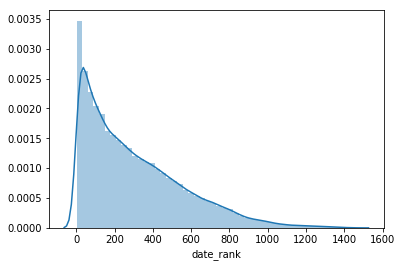

In [30]:
#Distribution of amount of games played in career so far for players with full career data
sns.distplot(hist_player_log_full[hist_player_log_full['full_name'].isin(full_careers)]['date_rank'])

In [12]:
#Pick interval of 100 , 200 , 300, 400+ games cumulative. (rolling)

In [31]:
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION,full_career_flag,date_rank
0,22000,51,20001188,"APR 18, 2001",VAN @ GSW,W,21,7,12,0.583,...,2001-04-18,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,277.0
1,22000,51,20001169,"APR 16, 2001",VAN @ SAC,L,17,5,10,0.500,...,2001-04-16,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,276.0
2,22000,51,20001153,"APR 14, 2001",VAN vs. HOU,L,23,12,19,0.632,...,2001-04-14,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,275.0
3,22000,51,20001137,"APR 12, 2001",VAN vs. POR,L,16,3,9,0.333,...,2001-04-12,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,274.0
4,22000,51,20001124,"APR 10, 2001",VAN vs. MIN,L,9,4,7,0.571,...,2001-04-10,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,273.0


In [32]:
#Calculate a relative career elapsed metric (between 0 and 1) depending on how far through their career that are at any point
total_games = hist_player_log_full.groupby(['Player_ID'])['date_rank'].max().reset_index().rename({'date_rank' : 'total_games'}, axis=1)
hist_player_log_full = hist_player_log_full.merge(total_games, on='Player_ID')

In [33]:
hist_player_log_full['career_elapsed_time'] = hist_player_log_full['date_rank']/hist_player_log_full['total_games']

In [34]:
hist_player_log_full[hist_player_log_full['full_name']=='Goran Dragic']

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION,full_career_flag,date_rank,total_games,career_elapsed_time
356252,22010,201609,21000002,"OCT 26, 2010",PHX @ POR,L,13,2,5,0.400,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,136.0,736.0,0.184783
356253,22009,201609,20901230,"APR 14, 2010",PHX @ UTA,W,20,4,7,0.571,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,135.0,736.0,0.183424
356254,22009,201609,20901216,"APR 13, 2010",PHX vs. DEN,W,19,2,3,0.667,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,134.0,736.0,0.182065
356255,22009,201609,20901201,"APR 11, 2010",PHX vs. HOU,W,16,2,5,0.400,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,133.0,736.0,0.180707
356256,22009,201609,20901183,"APR 09, 2010",PHX @ OKC,L,17,3,7,0.429,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,132.0,736.0,0.179348
356257,22009,201609,20901170,"APR 07, 2010",PHX vs. SAS,W,19,2,8,0.250,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,131.0,736.0,0.177989
356258,22009,201609,20901138,"APR 03, 2010",PHX @ MIL,L,26,7,12,0.583,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,130.0,736.0,0.176630
356259,22009,201609,20901127,"APR 02, 2010",PHX @ DET,W,24,1,7,0.143,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,129.0,736.0,0.175272
356260,22009,201609,20901113,"MAR 31, 2010",PHX @ NJN,W,18,5,8,0.625,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,128.0,736.0,0.173913
356261,22009,201609,20901104,"MAR 30, 2010",PHX @ CHI,W,12,1,5,0.200,...,1986-05-06T00:00:00,2008,2018,75,190,Guard,0,127.0,736.0,0.172554


In [35]:
#Form data into growth vector format (wide)
player_1 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.2].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_first_' + c, axis = 1).reset_index()
player_2 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.4].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_second_' + c, axis = 1).reset_index()
player_3 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.6].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_third_' + c, axis = 1).reset_index()
player_4 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.8].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_fourth_' + c, axis = 1).reset_index()
player_5 = hist_player_log_full.groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_last_' + c, axis = 1).reset_index()
player_stat_df = player_1.merge(player_2, on='Player_ID', how='left').merge(player_3, on='Player_ID', how='left').\
            merge(player_4, on='Player_ID', how='left').merge(player_5, on='Player_ID', how='left')
player_stat_df[player_stat_df['Player_ID']==2544]

,Player_ID,career_first_FGM,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,career_second_FGM,...,career_fourth_BLK,career_fourth_PTS,career_last_FGM,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS
917,2544,2264,298.0,1410,1564.0,1552.0,429.0,175.0,6236,4626,...,744.0,25686,11620,1684.0,7042,8698.0,8451.0,1909.0,912.0,31966


In [36]:
#Min max normalisation on each players growth vector, to squeeze between 0 and 1.
def normfn(x):
    if x.max()==x.min():
        xy = x*0
    else:
        xy = (x-x.min())/(x.max()-x.min())
    return(xy)

In [37]:
for i in player_stat_df['Player_ID'].unique():
    for j in stat_columns:
        wanted_cols = [col for col in player_stat_df.columns if j in col]
        #0,1 normalised the player career vector
        normalised = player_stat_df[player_stat_df['Player_ID']==i][wanted_cols].apply(normfn, axis=1)
        row_index = player_stat_df[player_stat_df['Player_ID']==i].index
        for k in range(0,len(normalised.columns)):
            player_stat_df.loc[row_index, wanted_cols[k]] = normalised.iloc[0][k]

In [38]:
player_stat_df[player_stat_df['Player_ID']==2544][wanted_cols].apply(normfn, axis=1)

,career_first_PTS,career_second_PTS,career_third_PTS,career_fourth_PTS,career_last_PTS
917,0.0,0.260047,0.514458,0.755927,1.0


In [39]:
len(hist_player_log_full['Player_ID'].unique())

2206

# K-Means clustering check

In [100]:
from sklearn.cluster import KMeans
df_for_cluster = player_stat_df[player_stat_df['Player_ID'].isin(full_careers.keys())].drop('Player_ID', axis=1)
rss_dist = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_for_cluster.filter(regex=("FGM.*")))
    rss_dist.append(km.inertia_)


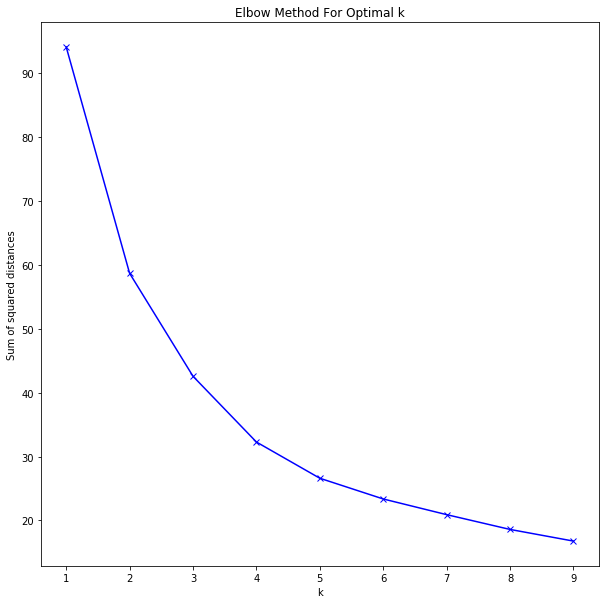

In [94]:
plt.figure(figsize=(10,10))
plt.plot(K, rss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
#UPDATE : this now suggests 4 or 5 cluster solution is best

1209
1209


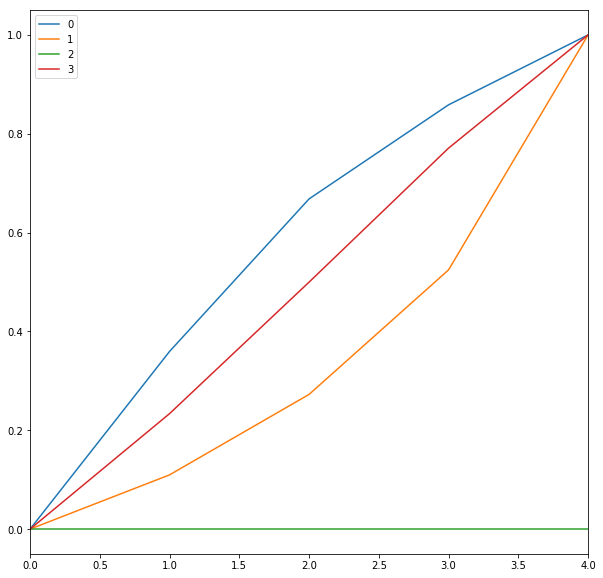

In [110]:
from sklearn.cluster import KMeans

df_for_cluster = player_stat_df[player_stat_df['Player_ID'].isin(full_careers.keys())].drop('Player_ID', axis=1)

km = KMeans(4)
km = km.fit(df_for_cluster.filter(regex=("FGM.*")))
pd.DataFrame(km.cluster_centers_).T.plot(figsize=(10,10))
print(len(df_for_cluster))
print(len(km.labels_))

In [130]:
# df_with_cluster = pd.DataFrame(player_stat_df, index=km.labels_).reset_index().rename({'index':'cluster'}, axis=1)
df_with_cluster = player_stat_df[player_stat_df['Player_ID'].isin(full_careers.keys())].copy()
# df_with_cluster = df_with_cluster.merge(hist_player_info.drop_duplicates(),left_on='Player_ID', right_on='PERSON_ID', how='left')
df_with_cluster['full_name'] = df_with_cluster['Player_ID'].map(full_careers)
df_with_cluster['cluster']= km.labels_
df_with_cluster
df_with_cluster[df_with_cluster['cluster']==1]

,Player_ID,career_first_FGM,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,career_second_FGM,...,career_last_FGM,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS,full_name,cluster
96,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266667,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Tim Breaux,1
116,189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080645,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,B.J. Tyler,1
268,474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Stefano Rusconi,1
270,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192982,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Melvin Booker,1
275,675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042553,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,Junior Burrough,1
291,691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Lou Roe,1
301,701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,Frankie King,1
312,712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137931,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Mario Bennett,1
326,726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173913,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Sherell Ford,1
328,728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106796,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Jimmy King,1


In [131]:
top_players = hist_player_log_full.groupby(['full_name'])['date_rank'].max().sort_values(ascending=False).head(100).reset_index()
df_with_cluster[df_with_cluster['full_name'].isin(top_players['full_name'])]


,Player_ID,career_first_FGM,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,career_second_FGM,...,career_last_FGM,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS,full_name,cluster
91,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157760,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Jalen Rose,3
139,224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287250,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Eddie Jones,0
156,255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344316,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Grant Hill,0
249,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.378676,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Juwan Howard,0
264,467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324860,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Jason Kidd,0
286,686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436242,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Antonio McDyess,0
293,693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.310702,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Joe Smith,3
299,699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293269,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Brent Barry,0
303,703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387385,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Kurt Thomas,0
308,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.310645,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Kevin Garnett,0


## This clustering is not categorising careers very well.

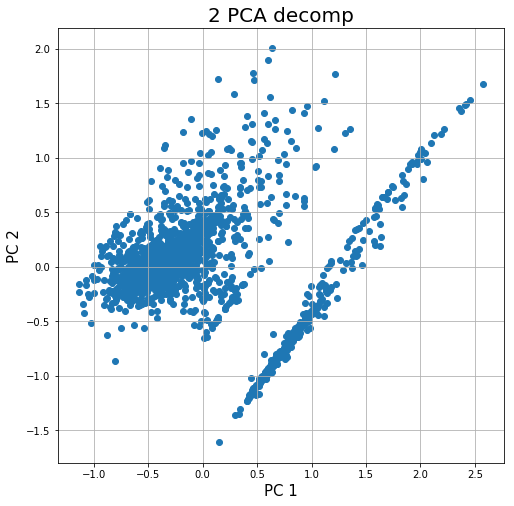

In [103]:
from sklearn.decomposition import PCA
data_for_pca = player_stat_df.drop('Player_ID', axis=1)
pca = PCA(2)
pca.fit(data_for_pca)
data_for_pca=pca.transform(data_for_pca)
principalDf = pd.DataFrame(data = data_for_pca
             , columns = ['principal component 1', 'principal component 2'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 PCA decomp', fontsize = 20)
ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])
ax.grid()